In [1]:
import pandas as pd
df = pd.read_csv('../data/etf/spy.csv', parse_dates=True, index_col=0)
df.rename(columns={'Close':'SPY'}, inplace=True)
df.drop(['Open','High','Low','Volume','Dividends','Stock Splits'],
        axis=1,
        inplace=True)
df.dropna(axis=0, inplace=True)
df

,SPY
Date,
2017-01-03,210.63
2017-01-04,211.88
2017-01-05,211.71
2017-01-06,212.47
2017-01-09,211.77
...,...
2017-04-24,222.75
2017-04-25,224.04
2017-04-26,223.90


In [2]:
import numpy as np
df['Return_D'] = df.pct_change() 
df['Return_C'] = np.log(df['SPY']/df['SPY'].shift(1))
df

,SPY,Return_D,Return_C
Date,,,
2017-01-03,210.63,NaN,NaN
2017-01-04,211.88,0.005935,0.005917
2017-01-05,211.71,-0.000802,-0.000803
2017-01-06,212.47,0.003590,0.003583
2017-01-09,211.77,-0.003295,-0.003300
...,...,...,...
2017-04-24,222.75,0.011029,0.010969
2017-04-25,224.04,0.005791,0.005775
2017-04-26,223.90,-0.000625,-0.000625


$$\begin{array}{lll}
r_t^{(D)}=\frac{S_t-S_{t-1}}{S_{t-1}}
&\Rightarrow&1+r_t^{(D)}=\frac{S_t}{S_{t-1}}\\
&\Rightarrow&\prod_{t=1}^T \left(1+r_t^{(D)}\right)=\frac{S_T}{S_0}\\
&\Rightarrow&S_T=S_0\prod_{t=1}^T \left(1+r_t^{(D)}\right)\\
\\
r_t^{(C)}=\log\frac{S_t}{S_{t-1}}
&\Rightarrow&\sum_{t=1}^T r_t^{(C)}=\log\frac{S_T}{S_0}\\
&\Rightarrow&exp\left({\sum_{t=1}^T r_t^{(C)}}\right)=\frac{S_T}{S_0}\\
&\Rightarrow&S_T=S_0exp\left({\sum_{t=1}^T r_t^{(C)}}\right)\\
\end{array}$$

In [3]:
import numpy as np

df['Recon_D'] = (1+df['Return_D']).cumprod()
df.loc['2017-01-03', 'Recon_D'] = 1
df['Recon_D'] = df['Recon_D'] * df.loc['2017-01-03', 'SPY']

df['Recon_C'] = df['Return_C'].cumsum().apply(np.exp)
df.loc['2017-01-03', 'Recon_C'] = 1
df['Recon_C'] = df['Recon_C'] * df.loc['2017-01-03', 'SPY']

df

,SPY,Return_D,Return_C,Recon_D,Recon_C
Date,,,,,
2017-01-03,210.63,NaN,NaN,210.63,210.63
2017-01-04,211.88,0.005935,0.005917,211.88,211.88
2017-01-05,211.71,-0.000802,-0.000803,211.71,211.71
2017-01-06,212.47,0.003590,0.003583,212.47,212.47
2017-01-09,211.77,-0.003295,-0.003300,211.77,211.77
...,...,...,...,...,...
2017-04-24,222.75,0.011029,0.010969,222.75,222.75
2017-04-25,224.04,0.005791,0.005775,224.04,224.04
2017-04-26,223.90,-0.000625,-0.000625,223.90,223.90


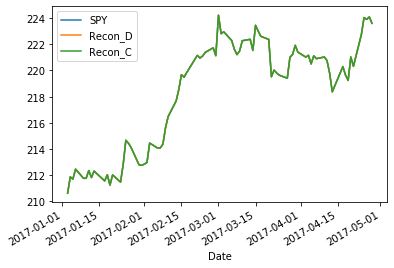

In [6]:
#df[['SPY']].plot()
#df[['SPY', 'Recon_D']].plot()
df[['SPY', 'Recon_D', 'Recon_C']].plot()